In [6]:
# Plot polynomials

def plotPoly(polys, name, L, R, col = None):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=col)
    show(a)

In [7]:
def Lagrange(points):
    #x = R.0
    var('x')
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

In [8]:
def plotGraph(points, name, color = None):
    n = len(points)
    assert(n > 1)
    pointsdx = points
    polys = []
    L = []
    R = []
    for i in range(n-1):
        P = Lagrange([pointsdx[i], pointsdx[i+1]])
        polys.append(P)
        L.append(pointsdx[i][0])
        R.append(pointsdx[i+1][0])
    plotPoly(polys, name, L, R, color)

# Problema 1

Tenemos:

$$ \frac{\partial^{2}\theta}{\partial t^{2}} + \frac{g}{l}\sin{\theta} = 0 $$

con $\theta(0) = \frac{\pi}{4}$ y $\theta'(0) = 0$.

Se señala que $g = 32.2$ y $l = 2$. Deseamos saber la naturaleza de $\theta(t)$ con $t \in [0, 1.6]$ usando $h = 0.05$

Si hacemos el cambio de variable:

$$ \theta_{1} = \theta(t) $$
$$ \theta_{2} = \theta'(t) $$

Tendremos el sistema:

$$ \theta_{1}' = \theta_{2} $$

$$ \theta_{2}' = -\frac{g}{l}\sin{\theta_{1}} $$

Al reemplazar los valores de $g$ y $l$:

$$ \theta_{2}' = -\frac{32.2}{2}\sin{\theta_{1}} = -16.1\sin{\theta_{1}} $$

In [11]:
# Runge-Kutta de orden 4
# t <- tiempo
# x1 <- Theta1
# x2 <- Theta2

PI = 3.14159265358979

h = 0.05
t = 0
x1 = PI / 4.0
x2 = 0
it = 32
points = [(t, x1, x2)]

R.<x,y,z> = RR[]

f = -16.1 * sin(x)

print(t, x1, x2)

for i in range(1, it + 1):
    m1 = h * x2
    k1 = h * f(x = x1, y = x2, z = t + h)
    m2 = h * (x2 + k1 / 2)
    k2 = h * f(x = x1 + m1 / 2, y = x2 + k1 / 2, z = t + h)
    m3 = h * (x2 + k2 / 2)
    k3 = h * f(x = x1 + m2 / 2, y = x2 + k2 / 2, z = t + h)
    m4 = h * (x2 + k3)
    k4 = h * f(x = x1 + m3, y = x2 + k3, z = t + h)
    x1 += (m1 + 2 * m2 + 2 * m3 + m4) / 6
    x2 += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    t += h
    points.append((t, x1, x2))
    print(t, x1, x2)

(0, 0.785398163397448, 0)
(0.0500000000000000, 0.771201510517536, -0.566506502866502)
(0.100000000000000, 0.729020614782495, -1.11659266737040)
(0.150000000000000, 0.660102156519140, -1.63305395039607)
(0.200000000000000, 0.566582059966549, -2.09751442418915)
(0.250000000000000, 0.451539046875794, -2.49076829560941)
(0.300000000000000, 0.319008921631333, -2.79401617951896)
(0.350000000000000, 0.173916335973094, -2.99088217513363)
(0.400000000000000, 0.0218950277256375, -3.06975625923991)
(0.450000000000000, -0.131002656819519, -3.02575607459806)
(0.500000000000000, -0.278669976105471, -2.86162209669764)
(0.550000000000000, -0.415320022840526, -2.58721018549205)
(0.600000000000000, -0.535802478417715, -2.21777361512097)
(0.650000000000000, -0.635816602190685, -1.77165181703272)
(0.700000000000000, -0.712009361389808, -1.26809979778268)
(0.750000000000000, -0.761980565738456, -0.725802863041336)
(0.800000000000000, -0.784235947682349, -0.162286747819860)
(0.850000000000000, -0.7781315867

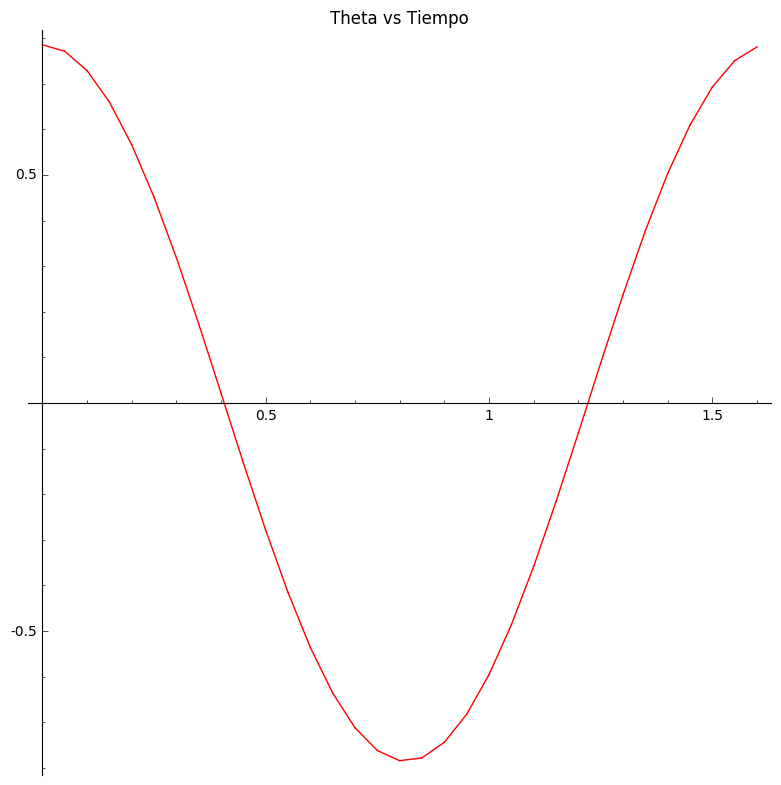

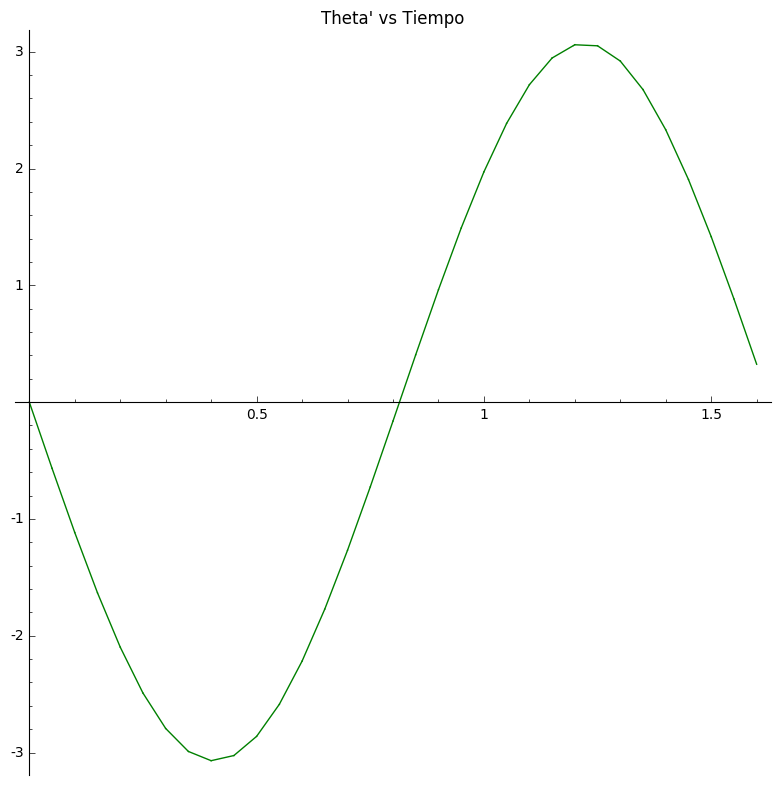

In [12]:
FvT = [(x[0], x[1]) for x in points]
dFvT = [(x[0], x[2]) for x in points]

plotGraph(FvT, "Theta vs Tiempo", "red")
plotGraph(dFvT, "Theta' vs Tiempo", "green")

# Problema 3

Una cuerda de banjo que mide $80$ cm de largo y pesa $1$ gr es traccionada con una fuerza $F = 40 Kg$, en un punto a $20$ cm de un extremo, se tira de la cuerda $0.6$ cm con respecto a la posición de equilibrio y luego se suelta. 

Determine los desplazamientos a lo largo de la cuerda como función del tiempo, utilizando $c = 1$, $\Delta x = 10$ y $\Delta t = 10$

Ya que la cuerda está en reposo en el momento en que se suelta, se tendrá que la velocidad inicial es 0, así que la ecuación para los primeros valores de $u_{i, j}$ es:

$$ u_{i, 1} = \frac{u_{i - 1, 0} + u_{i + 1, 0}}{2} $$

Mientras que para el resto, se usa:

$$ u_{i, j + 1} = u_{i + 1, j} + u_{i - 1, j} - u_{i, j - 1} $$

Dado que tenemos un punto de referencia, debemos considerar los desplazamientos iniciales:

$$ u(0, 0) = 0, u(20, 0) = 0.6 \rightarrow u(x, 0) = \frac{3x}{100}, \forall 0 \leq x \leq 20 $$

$$ u(20, 0) = 0.6, u(80, 0) = 0 \rightarrow u(x, 0) = \frac{(80 - x)}{100}, \forall 20 \leq x \leq 80 $$

In [68]:
# u_{i, j} <- x = i * h, t = j * k

h = 10
k = 10

n = 8
m = 20

u = [[0 for j in range(m + 2)] for i in range(n + 1)]

for i in range(1, n):
    u[i][0] = 3 * i * h / 100 if i <= 2 else (80 - h * i) / 100

for i in range(1, n):
    u[i][1] = (u[i - 1][0] + u[i + 1][0]) / 2.0

for j in range(2, m + 1):
    for i in range(1, n):
        u[i][j] = u[i + 1][j - 1] + u[i - 1][j - 1] - u[i][j - 2]

for i in range(m + 1):
    for j in range(n + 1):
        print(u[j][i].n(digits = 10)),
    print("")

print("\nRepeticion de valores")
for i in range(n + 1):
    print(u[i][0].n(digits = 10)),
print("")
for i in range(n + 1):
    print(u[i][16].n(digits = 10)),
print("")

0.0000000000 0.3000000000 0.6000000000 0.5000000000 0.4000000000 0.3000000000 0.2000000000 0.1000000000 0.0000000000 
0.0000000000 0.3000000000 0.4000000000 0.5000000000 0.4000000000 0.3000000000 0.2000000000 0.1000000000 0.0000000000 
0.0000000000 0.1000000000 0.2000000000 0.3000000000 0.4000000000 0.3000000000 0.2000000000 0.1000000000 0.0000000000 
0.0000000000 -0.1000000000 5.551115123e-17 0.1000000000 0.2000000000 0.3000000000 0.2000000000 0.1000000000 0.0000000000 
0.0000000000 -0.1000000000 -0.2000000000 -0.1000000000 1.665334537e-16 0.1000000000 0.2000000000 0.1000000000 0.0000000000 
0.0000000000 -0.1000000000 -0.2000000000 -0.3000000000 -0.2000000000 -0.1000000000 8.326672685e-17 0.1000000000 0.0000000000 
0.0000000000 -0.1000000000 -0.2000000000 -0.3000000000 -0.4000000000 -0.3000000000 -0.2000000000 -0.1000000000 0.0000000000 
0.0000000000 -0.1000000000 -0.2000000000 -0.3000000000 -0.4000000000 -0.5000000000 -0.4000000000 -0.3000000000 0.0000000000 
0.0000000000 -0.10000000

Dados los resultados, podemos notar que en la iteración 0 y la iteración 16 se repiten los valores, por lo tanto uno puede estimar el periodo en base a ello, con bastante cuidado al analizar las unidades.

# Problema 4

Tenemos una ecuación de calor $u(x, t)$ con:

$$ L = 10, k = 0.835, \Delta x = 2, \Delta t = 0.1 $$

$$ u(x, 0) = 0 $$

Además, se tienen las condiciones de frontera:

$$ u(0, t) = 100, u(10, t) = 50 $$

El método explícito propone que:

$$ \lambda = \frac{k \Delta t}{(\Delta x)^{2}} $$

Y la ecuación para obtener $u_{i, j}$ es:

$$ u_{i, j + 1} = u_{i, j} + \lambda\left(u_{i + 1, j} - 2 u_{i, j} + u_{i - 1, j}\right) $$

In [70]:
# u_{i, j} <- x = i * h, t = j * k

h = 2
k = 0.1

n = 5
m = 200

l = 0.835 * k / h / h

u = [[0 for j in range(m + 2)] for i in range(n + 1)]

for i in range(0, m + 2):
    u[0][i] = 100
    u[n][i] = 50

print(l)
    
for j in range(1, m + 1):
    for i in range(1, n):
        u[i][j] = u[i][j - 1] + l * (u[i + 1][j - 1]- 2 * u[i][j - 1] + u[i - 1][j - 1])
        
for i in range(m + 1):
    for j in range(n + 1):
        print(u[j][i].n(digits = 10)),
    print("")

# Aproximación en T(2, 10) = u(1, 100)
print(u[1][100])

0.0208750000000000
100.0000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000 50.00000000 
100.0000000 2.087500000 0.0000000000 0.0000000000 1.043750000 50.00000000 
100.0000000 4.087846875 0.04357656250 0.02178828125 2.043923438 50.00000000 
100.0000000 6.005588929 0.1275458749 0.06445518301 3.002794464 50.00000000 
100.0000000 7.845018111 0.2489330055 0.1271100337 3.922523297 50.00000000 
100.0000000 9.610185081 0.4049582275 0.2088823401 4.805161372 50.00000000 
100.0000000 11.30491336 0.5930242539 0.3089227490 5.652656303 50.00000000 
100.0000000 12.93281261 0.8107043200 0.4264038059 6.466856665 50.00000000 
100.0000000 14.49729113 1.055731057 0.5605205326 7.249516579 50.00000000 
100.0000000 16.00156761 1.325986104 0.7104908447 8.002300128 50.00000000 
100.0000000 17.44868213 1.619490405 0.8755558271 8.726785594 50.00000000 
100.0000000 18.84150651 1.934395147 1.054979883 9.424469523 50.00000000 
100.0000000 20.18275411 2.268973303 1.248050773 10.09677063 50.00000000 
100.0000